<a href="https://colab.research.google.com/github/WhiteHatCyberus/Deep-Model-Evaluation-Intrusion-Detection-System-using-NSL-KDD-CIC-IDS-2018/blob/main/Group_6_NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Intrusion Detection System (NSL-KDD Dataset)

---


### Group 6  - Sleety, Thejus, Tejas and Rahul 
#### Rajagiri School of Engineering and Technology (KTU 2019 Scheme)

In [ ]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow import keras

## Data Extraction and Organisation

In [ ]:
# Data Reading
train_file = '/content/drive/MyDrive/nslkdd/Data/KDDTrain+.txt'
test_file = '/content/drive/MyDrive/nslkdd/Data/KDDTest+.txt' 

train_df = pd.read_csv(train_file, header=None)
test_df = pd.read_csv(test_file, header=None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Header
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'target'
,'level'])

train_df.columns = columns
test_df.columns = columns

In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
train_df.shape

(125973, 43)

In [ ]:
test_df.shape

(22544, 43)

There are 43 columns (features) of which 3 categorical data, 1 class label and 39 numeric attributes

In [ ]:
# Conversion of attack categories into macro-categories (Normal,Dos,Probe,U2R,R2L)
def macro_target(df):
  df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

macro_target(train_df)
macro_target(test_df)

train_df['label'] = LabelEncoder().fit_transform(train_df['target'])
test_df['label'] = LabelEncoder().fit_transform(test_df['target'])

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,level,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,4


In [ ]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,level,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Dos,21,0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Dos,21,0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,4
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,Probe,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,Probe,11,1




---



## Data Exploration

### Distribution of macro-categories in the training set and in the test set

In [ ]:
train_attacks = train_df.target.value_counts()
train_attacks

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: target, dtype: int64

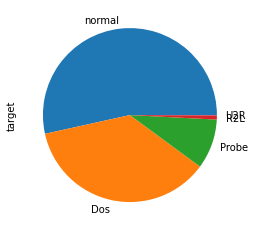

In [ ]:
train_attacks.plot(kind="pie")
plt.show()

There is a clear imbalance between the classes of the target. Little data on U2R and R2L attacks.

In [ ]:
test_attacks = test_df.target.value_counts()
test_attacks

normal    9711
Dos       7460
R2L       2885
Probe     2421
U2R         67
Name: target, dtype: int64

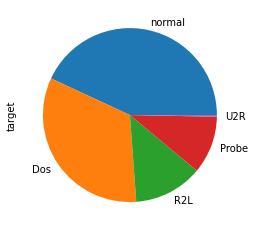

In [ ]:
test_attacks.plot(kind="pie")
plt.show()

In both datasets most of the traffic is obviously normal, but of the attacks, the most frequent is the Dos attack.\
In the training set there is a very low frequency of R2L attacks, compared to the test set.

### Distribution of protocols in testing and training sets

In [ ]:
train_protocols = train_df.protocol_type.value_counts()
train_protocols

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

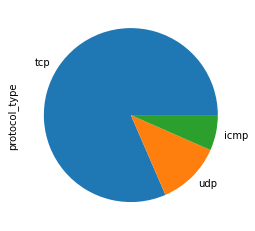

In [ ]:
train_protocols.plot(kind="pie")
plt.show()

In [ ]:
test_protocols = test_df.protocol_type.value_counts()
test_protocols

tcp     18880
udp      2621
icmp     1043
Name: protocol_type, dtype: int64

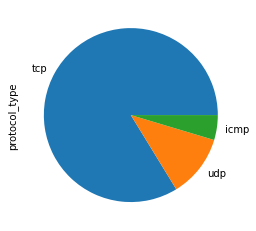

In [ ]:
test_protocols.plot(kind="pie")
plt.show()

The most used protocol is TCP



### Distribution of network protocols for each attack macro-category (in the training set)

In [ ]:
train_category_vs_protocol = pd.crosstab(train_df.protocol_type, train_df.target)
train_category_vs_protocol

target,Dos,Probe,R2L,U2R,normal
protocol_type,,,,,
icmp,2847,4135,0,0,1309
tcp,42188,5857,995,49,53600
udp,892,1664,0,3,12434


It should be noted that obviously the Dos attack also uses the icmp protocol, which is at layer 3 (Network) of the ISO/OSI model, and also the Probe attack.\
While the two R2L and U2R attacks are at layer 4 (Transport), so they only use the TCP protocol.\
Normal network traffic uses all 3 protocol types.

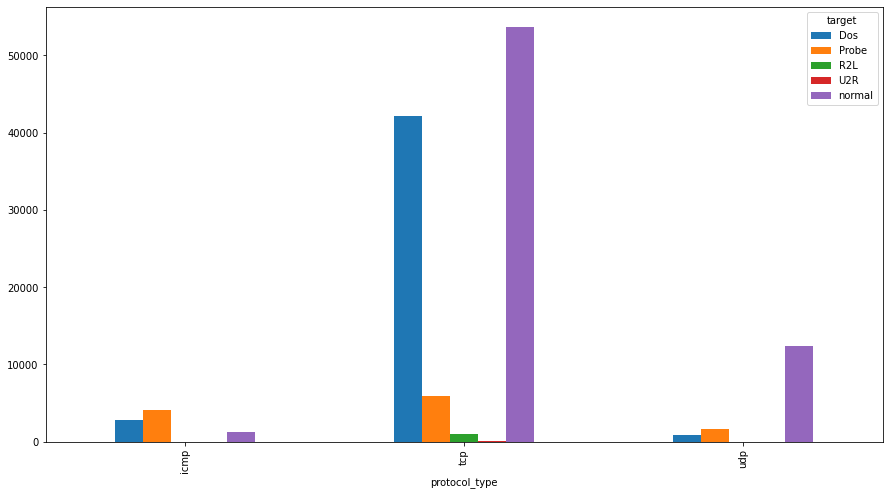

In [ ]:
train_category_vs_protocol.plot(kind="bar", figsize=(15,8))
plt.show()

All attacks make more use of the TCP protocol.\
R2L and U2R use TCP exclusively

### Distribution of services nto training and test sets.

In [ ]:
train_services = train_df.service.value_counts()
train_services

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

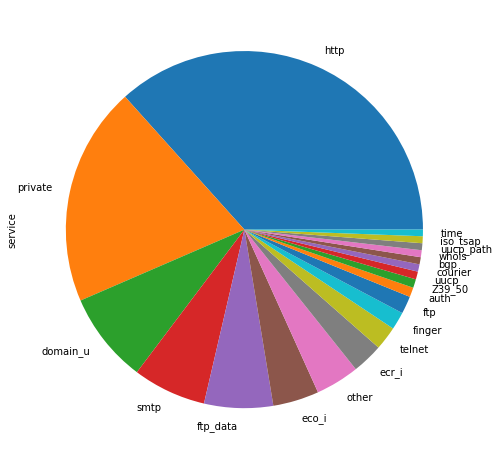

In [ ]:
train_services[:20].plot(kind="pie", figsize=(8,10))
plt.show()

In [ ]:
test_services = test_df.service.value_counts()
test_services

http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64

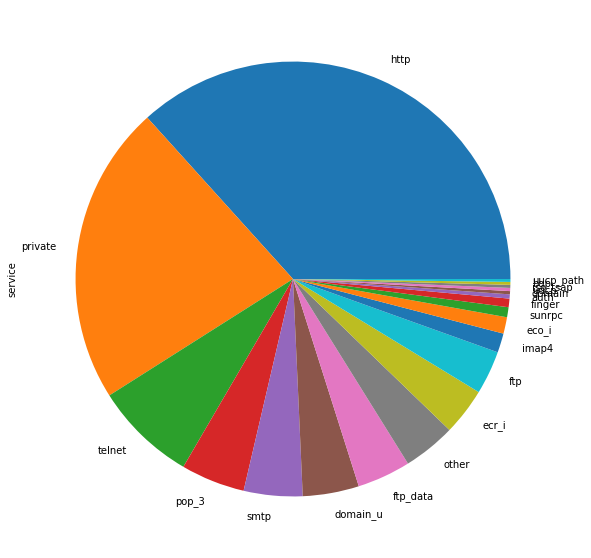

In [ ]:
test_services[:20].plot(kind="pie", figsize=(10,10))
plt.show()

The training set uses 70 services.\
The test set uses 64.\
The most frequent service is HTTP.

### Distribution of services for each attack macro-category (in the training set)

In [ ]:
category_vs_service = pd.crosstab(train_df.service,train_df.target)
category_vs_service

target,Dos,Probe,R2L,U2R,normal
service,,,,,
IRC,0,1,0,0,186
X11,0,6,0,0,67
Z39_50,851,11,0,0,0
aol,0,2,0,0,0
auth,703,16,0,0,236
...,...,...,...,...,...
urp_i,0,3,0,0,599
uucp,769,11,0,0,0
uucp_path,676,13,0,0,0


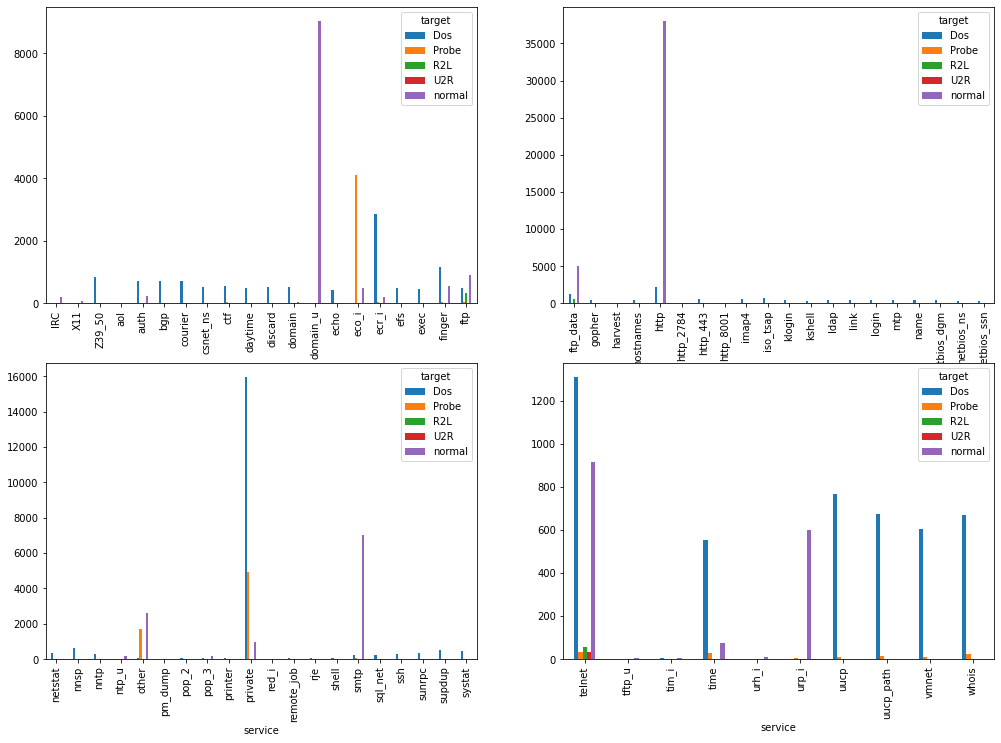

In [ ]:
fig, axes = plt.subplots(figsize=(17,12),nrows=2, ncols=2)

category_vs_service[:20].plot(ax=axes[0,0], kind='bar', grid=False)
category_vs_service[20:40].plot(ax=axes[0,1], kind='bar', grid=False)
category_vs_service[40:60].plot(ax=axes[1,0], kind='bar', grid=False)
category_vs_service[60:70].plot(ax=axes[1,1], kind='bar', grid=False)

plt.show()

SERVICES MOST USED:

NORMAL: HTTP (56%)\
DOS: PRIVATE (35%)\
PROBE: PRIVATE (42%)\
R2L: FTP_DATA (60%)\
U2R: TELNET (50%)

### Distribution of flags for each attack macro-category (in the training set)

In [ ]:
category_vs_flag = pd.crosstab(train_df.flag,train_df.target)
category_vs_flag

target,Dos,Probe,R2L,U2R,normal
flag,,,,,
OTH,0,35,0,0,11
REJ,5671,2869,0,0,2693
RSTO,1216,80,46,1,219
RSTOS0,0,103,0,0,0
RSTR,90,2180,5,0,146
S0,34344,153,0,0,354
S1,2,1,1,0,361
S2,5,2,1,0,119
S3,0,1,3,0,45


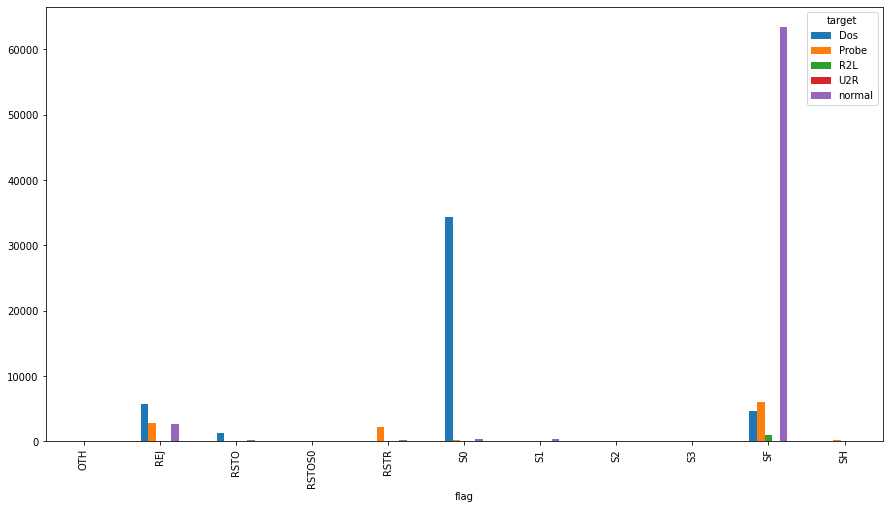

In [ ]:
category_vs_flag.plot(kind="bar", figsize=(15,8))
plt.show()



---



## Data Preprocessing

### Coding of Categorial Data (protocol-type, service, flag)
Label encoding per service\
One-hot encoding per protocol-type and flag

In [ ]:
# Label encoding per la feature "service"
train_df['service'] = LabelEncoder().fit_transform(train_df['service'])
test_df['service'] = LabelEncoder().fit_transform(test_df['service'])

# One-hot encoding per le features "protocol_type" e "flag"
train_df = pd.get_dummies(train_df, columns = ['protocol_type', 'flag'])
test_df = pd.get_dummies(test_df, columns = ['protocol_type', 'flag'])

In [ ]:
# estrazione del label ed eliminazione target
y_train = train_df['label']
X_train = train_df.drop(columns=['label','target'])

y_test = test_df['label']
X_test = test_df.drop(columns=['label','target'])

With one-hot encoding and the elimination of categorical data, the total number of Features becomes 54.

### ADASYN data augmentation
(to overcome class imbalance encountered during data exploration) 

In [ ]:
print("Original distribution of labels")
y_train.value_counts()

Original distribution of labels


4    67343
0    45927
1    11656
2      995
3       52
Name: label, dtype: int64

In [ ]:
ada = ADASYN(random_state=0)
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print("Final Distribution of Labels")
y_ada.value_counts()

Final Distribution of Labels


1    67510
2    67344
4    67343
3    67336
0    67238
Name: label, dtype: int64

### Normalization of data

In [ ]:
scaler = MinMaxScaler()

# ADASYN
X_ada_scaled = scaler.fit_transform(X_ada)
# NO ADASYN
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)



---


## ML base model


---



### Random Forest

In [ ]:
RFmodel = RandomForestClassifier(random_state=0)

#RFmodel.fit(X_train_scaled, y_train)
RFmodel.fit(X_ada_scaled, y_ada)

RFpredictions = RFmodel.predict(X_test_scaled)

acc_score = accuracy_score(RFpredictions,y_test)
print(f"Accuracy: {acc_score}")

Accuracy: 0.8097054648687012


Calculate TPR and FPR

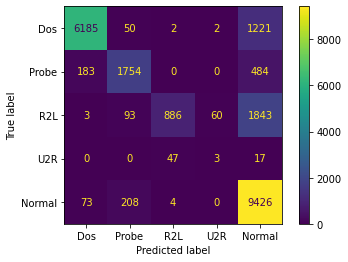

In [ ]:
# print the confusion matrix graph to view the incorrect predictions
c_matrix = confusion_matrix(y_test, RFpredictions)
cm_display = ConfusionMatrixDisplay(c_matrix,display_labels=['Dos','Probe','R2L','U2R','Normal']).plot()

In [ ]:
FP_RF = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN_RF = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP_RF = np.diag(c_matrix)
TN_RF = c_matrix.sum() - (FP_RF + FN_RF + TP_RF)

TPR_RF = TP_RF/(TP_RF+FN_RF)*100
FPR_RF = FP_RF/(FP_RF+TN_RF)*100

print(f"TPR Normal: {TPR_RF[4]}% - FPR Normal: {FPR_RF[4]}%")
print(f"TPR Dos: {TPR_RF[0]}% - FPR Dos: {FPR_RF[0]}%")
print(f"TPR Probe: {TPR_RF[1]}% - FPR Probe: {FPR_RF[1]}%")
print(f"TPR R2L: {TPR_RF[2]}% - FPR R2L: {FPR_RF[2]}%")
print(f"TPR U2R: {TPR_RF[3]}% - FPR U2R: {FPR_RF[3]}%")

TPR Normal: 97.06518381217177% - FPR Normal: 27.779942336164577%
TPR Dos: 82.9088471849866% - FPR Dos: 1.7170511800583401%
TPR Probe: 72.44940107393639% - FPR Probe: 1.7442727227550563%
TPR R2L: 30.7105719237435% - FPR R2L: 0.2695966224121268%
TPR U2R: 4.477611940298507% - FPR U2R: 0.27583752280108553%




---



## Feedforward neural network model

Split the training set (training and validation)

In [ ]:
X, X_val, y, y_val = train_test_split(X_ada_scaled, y_ada, test_size=0.20, random_state=0)

print(f"Training Length: {len(X)}")
print(f"Validation Length: {len(X_val)}")

Training Length: 269416
Validation Length: 67355


Constructing the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14080     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1

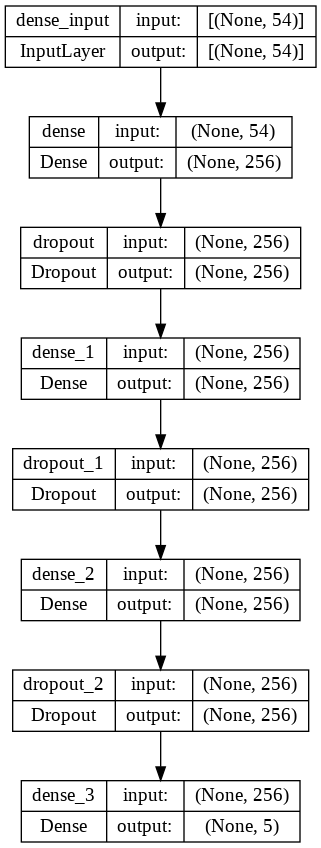

In [ ]:
input_shape = X.shape[1:]

NN_model = keras.Sequential(
    [
        keras.layers.Dense(256, activation="relu", input_shape=(input_shape)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(5, activation="softmax"),
    ]
)
NN_model.summary()

NN_model.compile("adam", "sparse_categorical_crossentropy", metrics="accuracy")

keras.utils.plot_model(NN_model, show_shapes=True, show_layer_names=True)

Training the Model

In [ ]:
# parameters
epochs = 10
batch_size = 64
checkpoint_filepath = '/content/drive/MyDrive/nslkdd/Best_NN/checkpoint.hdf5'

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

'''
# Model Training
history = NN_model.fit(X,y,batch_size=batch_size,epochs=epochs,validation_data=(X_val, y_val),callbacks=[checkpoint_callback])

# Accuracy Trend Graph
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()
'''

'\n# Model Training\nhistory = NN_model.fit(X,y,batch_size=batch_size,epochs=epochs,validation_data=(X_val, y_val),callbacks=[checkpoint_callback])\n\n# Accuracy Trend Graph\nmetric = "accuracy"\nplt.figure()\nplt.plot(history.history[metric])\nplt.plot(history.history["val_" + metric])\nplt.title("model " + metric)\nplt.ylabel(metric, fontsize="large")\nplt.xlabel("epoch", fontsize="large")\nplt.legend(["train", "val"], loc="best")\nplt.show()\nplt.close()\n'

In [ ]:
NN_model.load_weights(checkpoint_filepath)

Evaluation of the model on the test set

In [ ]:
test_loss, test_acc = NN_model.evaluate(X_test_scaled, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

705/705 [==============================] - 4s 2ms/step - loss: 2.8863 - accuracy: 0.8258
Test accuracy 0.825762927532196
Test loss 2.8862643241882324


Test set predictions and comparison with true labels

In [ ]:
NNpredictions = NN_model.predict(X_test_scaled)

NNpredictions = np.argmax(NNpredictions,axis = 1)
y_true = np.array(y_test)

705/705 [==============================] - 4s 3ms/step


Confusion matrix to display false positives/negatives

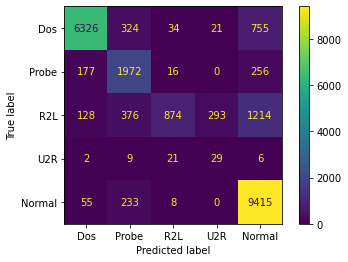

In [ ]:
# Print confusion matrix graph to display incorrect predictions
c_matrix = confusion_matrix(y_true, NNpredictions)
cm_display = ConfusionMatrixDisplay(c_matrix,display_labels=['Dos','Probe','R2L','U2R','Normal']).plot()

Calculation of TPR and FPR

In [ ]:
FP_NN = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN_NN = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP_NN = np.diag(c_matrix)
TN_NN = c_matrix.sum() - (FP_NN + FN_NN + TP_NN)

TPR_NN = TP_NN/(TP_NN+FN_NN)*100
FPR_NN = FP_NN/(FP_NN+TN_NN)*100

print(f"TPR Normal: {TPR_NN[4]}% - FPR Normal: {FPR_NN[4]}%")
print(f"TPR Dos: {TPR_NN[0]}% - FPR Dos: {FPR_NN[0]}%")
print(f"TPR Probe: {TPR_NN[1]}% - FPR Probe: {FPR_NN[1]}%")
print(f"TPR R2L: {TPR_NN[2]}% - FPR R2L: {FPR_NN[2]}%")
print(f"TPR U2R: {TPR_NN[3]}% - FPR U2R: {FPR_NN[3]}%")

TPR Normal: 96.95191020492226% - FPR Normal: 17.384867139406218%
TPR Dos: 84.79892761394102% - FPR Dos: 2.399893927340228%
TPR Probe: 81.45394465097068% - FPR Probe: 4.68121055508622%
TPR R2L: 30.294627383015598% - FPR R2L: 0.4018515692558116%
TPR U2R: 43.28358208955223% - FPR U2R: 1.396983583218401%




---



## CNN LSTM Network Model

Convolutional Network Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, Convolution1D, Activation, MaxPooling1D, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

cnn = keras.Sequential()
cnn.add(Convolution1D(128, 3, padding="same",activation="relu",input_shape=(X.shape[1], 1)))
cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(30))
cnn.add(Dropout(0.1))
cnn.add(Dense(5, activation="softmax"))

cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 54, 128)           512       
                                                                 
 conv1d_1 (Conv1D)           (None, 54, 128)           49280     
                                                                 
 conv1d_2 (Conv1D)           (None, 54, 128)           49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 27, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 30)                19080     
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                      

In [ ]:
epochs = 10
batch_size = 64
checkpoint_filepath = '/content/drive/MyDrive/nslkdd/Best_CNN/checkpoint.hdf5'

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

'''
# Model Training
history = cnn.fit(X, y, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val),callbacks=[checkpoint_callback])

# Accuracy graph
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()
'''

'\n# Model Training\nhistory = cnn.fit(X, y, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val),callbacks=[checkpoint_callback])\n\n# Accuracy graph\nmetric = "accuracy"\nplt.figure()\nplt.plot(history.history[metric])\nplt.plot(history.history["val_" + metric])\nplt.title("model " + metric)\nplt.ylabel(metric, fontsize="large")\nplt.xlabel("epoch", fontsize="large")\nplt.legend(["train", "val"], loc="best")\nplt.show()\nplt.close()\n'

In [ ]:
cnn.load_weights(checkpoint_filepath)

In [ ]:
test_loss, test_acc = cnn.evaluate(X_test_scaled, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

705/705 [==============================] - 9s 4ms/step - loss: 1.4742 - accuracy: 0.8116
Test accuracy 0.8116128444671631
Test loss 1.4741501808166504


In [ ]:
CNNpredictions = cnn.predict(X_test_scaled)

CNNpredictions = np.argmax(CNNpredictions,axis = 1)
y_true = np.array(y_test)

705/705 [==============================] - 3s 3ms/step


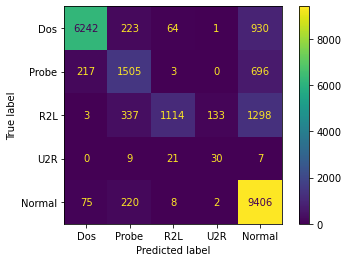

In [ ]:
# Print confusion matrix graph to display incorrect predictions
c_matrix = confusion_matrix(y_true, CNNpredictions)
cm_display = ConfusionMatrixDisplay(c_matrix,display_labels=['Dos','Probe','R2L','U2R','Normal']).plot()

In [ ]:
FP_CNN = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN_CNN = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP_CNN = np.diag(c_matrix)
TN_CNN = c_matrix.sum() - (FP_CNN + FN_CNN + TP_CNN)

TPR_CNN = TP_CNN/(TP_CNN+FN_CNN)*100
FPR_CNN = FP_CNN/(FP_CNN+TN_CNN)*100

print(f"TPR Normal: {TPR_CNN[4]}% - FPR Normal: {FPR_CNN[4]}%")
print(f"TPR Dos: {TPR_CNN[0]}% - FPR Dos: {FPR_CNN[0]}%")
print(f"TPR Probe: {TPR_CNN[1]}% - FPR Probe: {FPR_CNN[1]}%")
print(f"TPR R2L: {TPR_CNN[2]}% - FPR R2L: {FPR_CNN[2]}%")
print(f"TPR U2R: {TPR_CNN[3]}% - FPR U2R: {FPR_CNN[3]}%")

TPR Normal: 96.85923179899083% - FPR Normal: 22.83955427413699%
TPR Dos: 83.67292225201072% - FPR Dos: 1.9557146645452135%
TPR Probe: 62.16439487814952% - FPR Probe: 3.9208865477314516%
TPR R2L: 38.613518197573654% - FPR R2L: 0.4883259575766824%
TPR U2R: 44.776119402985074% - FPR U2R: 0.6050629532410909%




---

